# Midterm Presentation - The Oscars Winners' Tour
INFO 5871-001
Fall 2019

_Keke Wu_

### Imports

In [1]:
import numpy as np
import numpy.random as rnd
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

### Load the data

In [2]:
oscars_original = pd.read_csv('Oscars-demographics-DFE.csv', encoding = "ISO-8859-1")
for col in oscars_original.columns: 
    print(col) 

_unit_id
_golden
_unit_state
_trusted_judgments
_last_judgment_at
birthplace
birthplace:confidence
date_of_birth
date_of_birth:confidence
race_ethnicity
race_ethnicity:confidence
religion
religion:confidence
sexual_orientation
sexual_orientation:confidence
year_of_award
year_of_award:confidence
award
biourl
birthplace_gold
date_of_birth_gold
movie
person
race_ethnicity_gold
religion_gold
sexual_orientation_gold
year_of_award_gold


### Data Preparation

#### _Construct a new dataframe that contains only columns of interest_

In [3]:
oscars = pd.DataFrame(oscars_original, columns=['_golden', 'birthplace', 'race_ethnicity' , 'date_of_birth', 'year_of_award', 'award', 'movie', 'person'])
oscars.head()

,_golden,birthplace,race_ethnicity,date_of_birth,year_of_award,award,movie,person
0,False,"Chisinau, Moldova",White,30-Sep-1895,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,False,"Glasgow, Scotland",White,2-Feb-1886,1930,Best Director,The Divine Lady,Frank Lloyd
2,False,"Chisinau, Moldova",White,30-Sep-1895,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,False,"Chicago, Il",White,23-Feb-1899,1932,Best Director,Skippy,Norman Taurog
4,False,"Salt Lake City, Ut",White,23-Apr-1894,1933,Best Director,Bad Girl,Frank Borzage


In [4]:
oscars.shape

(441, 8)

### Q1: Univariate - Race Ethinicity

In [33]:
# sns.countplot(oscars.race_ethnicity);
labels = oscars.race_ethnicity.tolist()
values = []

oscars.race_ethnicity.describe()
# fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
# fig.show()

count       441
unique        6
top       White
freq        411
Name: race_ethnicity, dtype: object

### Q1: Univariate - Award

In [6]:
oscars['award_combined'] = 'Best Director'
female_filter = oscars.award.str.contains('Actress')
oscars.loc[female_filter, 'award_combined'] = 'Best Acctress'
male_filter = oscars.award.str.contains('Actor')
oscars.loc[male_filter, 'award_combined'] = 'Best Actor'

In [7]:
oscars.head()

,_golden,birthplace,race_ethnicity,date_of_birth,year_of_award,award,movie,person,award_combined
0,False,"Chisinau, Moldova",White,30-Sep-1895,1927,Best Director,Two Arabian Knights,Lewis Milestone,Best Director
1,False,"Glasgow, Scotland",White,2-Feb-1886,1930,Best Director,The Divine Lady,Frank Lloyd,Best Director
2,False,"Chisinau, Moldova",White,30-Sep-1895,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,Best Director
3,False,"Chicago, Il",White,23-Feb-1899,1932,Best Director,Skippy,Norman Taurog,Best Director
4,False,"Salt Lake City, Ut",White,23-Apr-1894,1933,Best Director,Bad Girl,Frank Borzage,Best Director


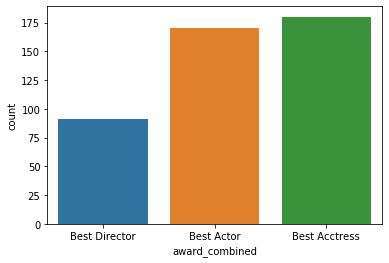

In [8]:
sns.countplot(oscars.award_combined);

In [9]:
golden_winner = oscars[oscars._golden == True].copy()
len(golden_winner) / len(oscars)

0.05668934240362812

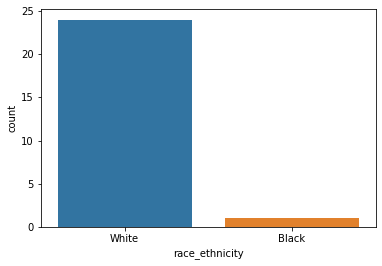

In [10]:
sns.countplot(golden_winner.race_ethnicity);

In [11]:
female_golden_winner = golden_winner[golden_winner.award_combined == 'Best Acctress']
male_golden_winner = golden_winner[golden_winner.award_combined == 'Best Actor']

In [12]:
male_golden_winner

,_golden,birthplace,race_ethnicity,date_of_birth,year_of_award,award,movie,person,award_combined
111,True,"Helena, Mt",White,7-May-1901,1953,Best Actor,High Noon,Gary Cooper,Best Actor
152,True,"Concord, Ca",White,9-Jul-56,1994,Best Actor,Philadelphia,Tom Hanks,Best Actor
179,True,"Walters, Ok",White,13-Dec-10,1943,Best Supporting Actor,Johnny Eager,Van Heflin,Best Actor
205,True,"Malden, Ma",White,16-Jun-07,1969,Best Supporting Actor,The Subject Was Roses,Jack Albertson,Best Actor
213,True,"Chicago, Il",White,26-Jul-22,1977,Best Supporting Actor,All the President's Men,Jason Robards,Best Actor
235,True,"Laurel, Ne",White,31-Aug-28,1999,Best Supporting Actor,Affliction,James Coburn,Best Actor


In [13]:
female_golden_winner

,_golden,birthplace,race_ethnicity,date_of_birth,year_of_award,award,movie,person,award_combined
263,True,"Independence, Mo",White,16-Jul-11,1941,Best Actress,Kitty Foyle,Ginger Rogers,Best Acctress
280,True,"Thomasville, Ga",White,27-Feb-30,1958,Best Actress,The Three Faces of Eve,Joanne Woodward,Best Acctress
289,True,"London, England",White,27-Feb-32,1967,Best Actress,Who's Afraid of Virginia Woolf?,Elizabeth Taylor,Best Acctress
293,True,"Ilford, Essex, England",White,28-Dec-34,1970,Best Actress,The Prime of Miss Jean Brodie,Maggie Smith,Best Acctress
300,True,"Bascom, Fl",White,14-Jan-41,1977,Best Actress,Network,Faye Dunaway,Best Acctress
322,True,"Los Angeles, Ca",White,27-Sep-72,1999,Best Actress,Shakespeare in Love,Gwyneth Paltrow,Best Acctress
328,True,"Lincoln, Ne",White,30-Jul-74,2005,Best Actress,Million Dollar Baby,Hilary Swank,Best Acctress
343,True,"Quincy, Il",White,3-May-06,1942,Best Supporting Actress,The Great Lie,Mary Astor,Best Acctress
347,True,New York City,White,25-Jun-1903,1946,Best Supporting Actress,National Velvet,Anne Revere,Best Acctress
377,True,New York City,White,31-Oct-27,1976,Best Supporting Actress,Shampoo,Lee Grant,Best Acctress
